## MNIST

In [197]:
from tensorflow.keras.datasets.mnist import load_data

In [198]:
(X_train, y_train), (X_test, y_test) = load_data()

In [199]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [200]:
import matplotlib.pyplot as plt
import numpy as np

In [201]:
sample_size=3

In [202]:
ridx = np.random.randint(len(X_train), size=sample_size)

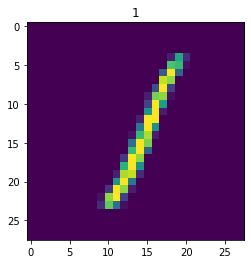

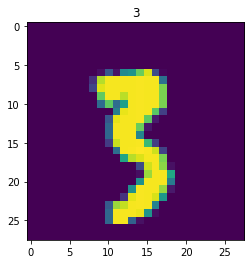

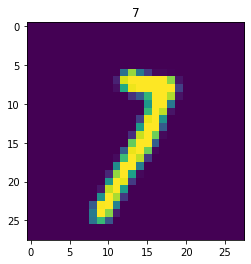

In [203]:
for idx in ridx:
    plt.figure()
    plt.imshow(X_train[idx])
    plt.title(y_train[idx])

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)

In [206]:
num_x_train = len(X_train)
num_x_val = len(X_val)
num_x_test = len(X_test)

In [207]:
X_train = (X_train.reshape((num_x_train, 28 * 28))) / 255
X_val = (X_val.reshape((num_x_val, 28 * 28))) / 255
X_test = (X_test.reshape((num_x_test, 28 * 28))) / 255

In [208]:
X_train.shape

(42000, 784)

In [209]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [210]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [211]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.losses import mse

In [212]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [213]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [214]:
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_data= (X_val, y_val), verbose=0)

In [219]:
def draw_history(history):
    his_dict = history.history
    loss = his_dict['loss']
    val_loss = his_dict['val_loss']
    acc = his_dict['accuracy']
    val_acc = his_dict['val_accuracy']
    
    epochs = range(1, len(loss) + 1)
    
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(1,2,1)
    ax1.plot(epochs, loss, label='train_loss')
    ax1.plot(epochs, val_loss, label='val_loss')
    ax1.legend()
    ax1.set_title('Loss Graph')
    
    ax2 = fig.add_subplot(1,2,2)
    ax2.plot(epochs, acc, label='train_accuracy')
    ax2.plot(epochs, val_acc, label='val_accuracy')
    ax2.set_title('Accuracy Graph')
    ax2.legend()
    plt.show()

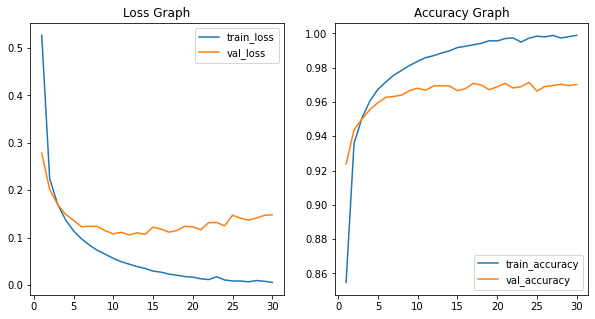

In [220]:
draw_history(history)

In [221]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 739us/step - loss: 0.1284 - accuracy: 0.9723


[0.128441721200943, 0.9722999930381775]

In [222]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [223]:
results = model.predict(X_test)
cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(results, axis=-1))

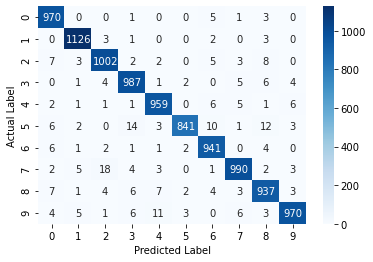

In [224]:
sns.heatmap(cm, annot=True, fmt ='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [225]:
print('\n',classification_report(np.argmax(y_test,axis=-1), np.argmax(results, axis=-1)))


               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.99      0.94      0.97       892
           6       0.97      0.98      0.97       958
           7       0.98      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## Fashion MNIST

In [226]:
from tensorfloaw.keras.datasets.fashion_mnist import load_data as fashion_mnist_load_data

In [227]:
(X_train, y_train), (X_test, y_test) = fashion_mnist_load_data()

In [228]:
print(X_train.shape)
print(X_test.shape)
print(np.unique(y_train))

(60000, 28, 28)
(10000, 28, 28)
[0 1 2 3 4 5 6 7 8 9]


In [229]:
class_names = ['T-Shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [230]:
sample_size = 9
random_idx = np.random.randint(len(X_train), size=sample_size)

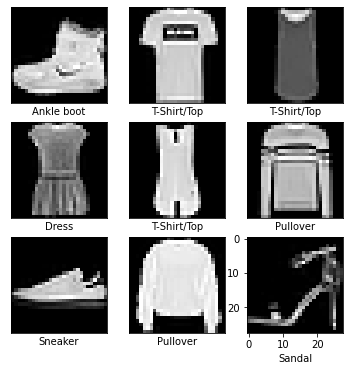

In [231]:
plt.figure(figsize=(6,6))
for i, idx in enumerate(random_idx):
    plt.xticks([])
    plt.yticks([])
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [232]:
X_train = X_train / 255
X_test = X_test / 255

In [233]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [234]:
from sklearn.model_selection import train_test_split

In [235]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.3)

In [236]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [237]:
base_model = Sequential()
base_model.add(Flatten(input_shape=(28,28)))
base_model.add(Dense(64, activation='relu'))
base_model.add(Dense(32, activation='relu'))
base_model.add(Dense(10, activation='softmax'))

In [238]:
base_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [239]:
base_history = base_model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                              batch_size=128, epochs=30, verbose=0)

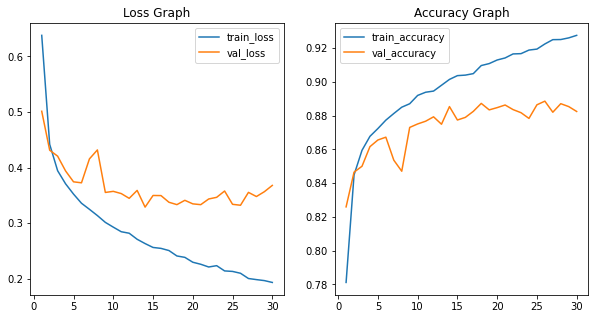

In [240]:
draw_history(base_history)

In [241]:
second_model = Sequential()
second_model.add(Flatten(input_shape=(28,28)))
second_model.add(Dense(128, activation='relu'))
second_model.add(Dense(128, activation='relu'))
second_model.add(Dense(32, activation='relu'))
second_model.add(Dense(10, activation='softmax'))

In [242]:
second_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [243]:
second_history = second_model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                              batch_size=128, epochs=30, verbose=0)

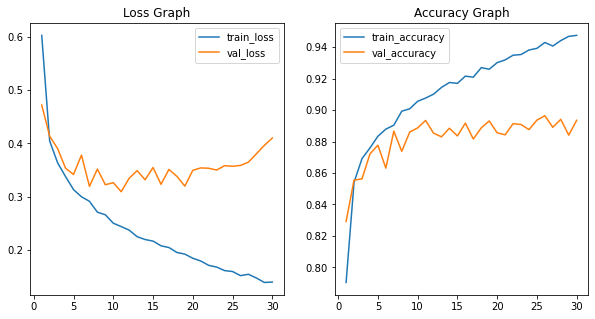

In [244]:
draw_history(second_history)

## Boston House Price 

In [245]:
from tensorflow.keras.datasets.boston_housing import load_data as boston_load_data

In [246]:
(X_train, y_train), (X_test, y_test) = boston_load_data()
print(X_train.shape, X_test.shape)

(404, 13) (102, 13)


In [247]:
from sklearn.preprocessing import StandardScaler

In [248]:
sc = StandardScaler()

In [249]:
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [250]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.3)

In [251]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [252]:
model.compile(optimizer='adam', metrics=['mae'], loss='mse')

In [253]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=300, verbose=0)

In [254]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 23.9459 - mae: 3.1094


[23.9459285736084, 3.1094210147857666]

In [255]:
#k-fold
from sklearn.model_selection import KFold
k = 3
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

def get_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(13,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [256]:
mae_list = []

(X_train, y_train), (X_test, y_test) = boston_load_data()

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

for train_idx, val_idx in kfold.split(X_train):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
    
    model = get_model()
    model.fit(X_train_fold, y_train_fold, epochs=300, validation_data=(X_val_fold, y_val_fold), verbose=0)
    _, test_mae = model.evaluate(X_test, y_test)
    mae_list.append(test_mae)

4/4 [==============================] - 0s 1ms/step - loss: 23.0681 - mae: 3.1790


In [257]:
print(mae_list, np.mean(mae_list))

[3.038987159729004, 2.475947380065918, 3.1789608001708984] 2.89796511332194


In [258]:
pred = model.predict(X_test)

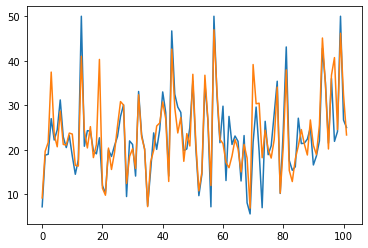

In [259]:
plt.plot(y_test)
plt.plot(pred)

## What kind of clothes and color

In [309]:
import pandas as pd

In [311]:
DATA_PATH = './data/apparel/'

train_df = pd.read_csv(DATA_PATH + 'train.csv').iloc[:,1:]
val_df = pd.read_csv(DATA_PATH + 'val.csv').iloc[:,1:]
test_df = pd.read_csv(DATA_PATH + 'test.csv').iloc[:,1:]

train_df.head()

,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes
0,./data/apparel/clothes_dataset/blue_shorts/256...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,./data/apparel/clothes_dataset/red_pants/584f7...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,./data/apparel/clothes_dataset/green_pants/ec5...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,./data/apparel/clothes_dataset/brown_shorts/c8...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,./data/apparel/clothes_dataset/white_dress/551...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [318]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

def get_steps(num_samples, batch_size):
    if num_samples % batch_size > 0:
        return num_samples // batch_size + 1
    else:
        return num_samples // batch_size
    
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(112,112,3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(11, activation='sigmoid'))

In [313]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [314]:
batch_size=32
class_col = ['black', 'blue', 'brown', 'green', 'red', 'white', 'dress', 'shirt', 'pants', 'shorts', 'shoes']

In [315]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_df,
    directory = '',
    x_col='image',
    y_col=class_col,
    target_size=(112,112),
    color_mode='rgb',
    class_mode='raw',
    batch_size=batch_size,
    shuffle=True
)

Found 5578 validated image filenames.


In [316]:
val_generator = val_datagen.flow_from_dataframe(
    dataframe = val_df,
    directory = '',
    x_col='image',
    y_col=class_col,
    target_size=(112,112),
    color_mode='rgb',
    class_mode='raw',
    batch_size=batch_size,
    shuffle=True
)

Found 2391 validated image filenames.


In [319]:
test_generator = test_datagen.flow_from_dataframe(
    dataframe = test_df,
    directory = '',
    x_col='image',
    y_col=class_col,
    target_size=(112,112),
    color_mode='rgb',
    class_mode='raw',
    batch_size=batch_size,
    shuffle=True
)

Found 3416 validated image filenames.


In [317]:
model.fit(train_generator, 
          steps_per_epoch=get_steps(len(train_df), batch_size),
          validation_data = val_generator,
          validation_steps=get_steps(len(val_df), batch_size),
          epochs=10)

Epoch 1/10
175/175 [==============================] - 31s 175ms/step - loss: 0.9646 - accuracy: 0.2576 - val_loss: 0.3108 - val_accuracy: 0.2476
Epoch 2/10
175/175 [==============================] - 29s 163ms/step - loss: 0.2944 - accuracy: 0.3836 - val_loss: 0.2589 - val_accuracy: 0.4312
Epoch 3/10
175/175 [==============================] - 30s 174ms/step - loss: 0.2420 - accuracy: 0.4503 - val_loss: 0.2814 - val_accuracy: 0.3425
Epoch 4/10
175/175 [==============================] - 31s 175ms/step - loss: 0.2301 - accuracy: 0.4706 - val_loss: 0.2465 - val_accuracy: 0.5588
Epoch 5/10
175/175 [==============================] - 28s 161ms/step - loss: 0.2095 - accuracy: 0.4986 - val_loss: 0.2188 - val_accuracy: 0.5111
Epoch 6/10
175/175 [==============================] - 29s 168ms/step - loss: 0.1989 - accuracy: 0.5071 - val_loss: 0.2249 - val_accuracy: 0.5554
Epoch 7/10
175/175 [==============================] - 28s 163ms/step - loss: 0.1928 - accuracy: 0.5309 - val_loss: 0.2117 - val_ac